In [134]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

Solve the Colebrook eqn
<img src="files/colebrook_eqn.svg">

Colebrook Equation:
$$\frac{1}{\sqrt{f}}=-2log(\frac{\epsilon}{3.7 D_h}+\frac{2.51}{Re \sqrt{f}})$$

In [73]:
from scipy.optimize import fsolve, root, fixed_point
import numpy as np

V = 7.75                    # Velocity [m/s]
L = 1                       # Channel length [m]
rho_air = 1.165             # Density 1.165 [kg/m^3]
mu_air = 1.748*10**-6       # Dynamic Viscocity [kg/(m-s)]
nu_air = rho_air/mu_air     # Kinematic Viscocity [s/m^2]

eps = 15*10**-6              # Roughness factor [m]
dia = .032                    # Hydraulic diameter [m]
Re = dia*V*nu_air             # Reynolds number [unitless]
(nu_air,Re,eps/dia)

In [113]:
def func(f, *args):
    """The Colebrook equation, used to solve for the friction factor
    :param f: Darcy friction factor
    :param arg: eps, d, Re
    f is solved for y = 0
    """
    eps, dia, Re = args # unpack args
    # 1/sqrt(f) = -2*np.log10(eps/(3.7*d)+2.51/(Re*np.sqrt(f)))
    # y = -2*np.log10(eps/(3.7*d)+2.51/(Re*np.sqrt(f)))-1/sqrt(f) 
    t1 = eps/(3.7*dia)
    t2 = 2.51/(Re*np.sqrt(f))
    t3 = 1/np.sqrt(f)
    y = 2*np.log10(t1+t2)+t3
    return y
    
data = (eps, dia, Re)
data

In [114]:
func(.01901857, *data)

In [115]:
fguess = .01
data = (eps, dia, Re)
x, *rest = fsolve(func, fguess, args = data, full_output=True)

In [116]:
x, rest

(array([0.01901857]),
 [{'nfev': 9,
   'fjac': array([[-1.]]),
   'r': array([201.25429477]),
   'qtf': array([-5.26293586e-09]),
   'fvec': array([1.50990331e-14])},
  1,
  'The solution converged.'])

In [117]:
def colebrook(eps, d, Re):
    def f(x):
        LHS = -2*np.log( eps/(3.7*d) + 2.51/(Re * np.sqrt(x))) - 1/(np.sqrt(x))
        return LHS
    return root(f, 0.02).x[0]

colebrook(eps, dia, Re)

SympifyError: SympifyError: <function colebrook.<locals>.f at 0x000000001A925620>

Try to solve symbolically

In [119]:
from sympy import *
init_printing(use_unicode=True)

In [120]:
e, d, R, f = symbols('e d R f')
x = symbols('x')

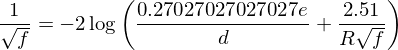

In [122]:
cb = Eq(1/sqrt(f), -2*log((1/3.7*e/d) + 2.51/(R*sqrt(f)), 10, evaluate=False))
cb

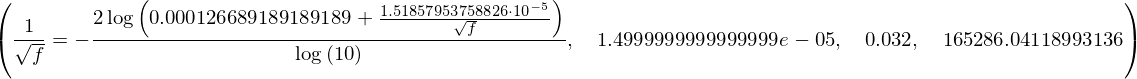

In [123]:
csub = cb.subs([(e, eps), (d, dia), (R, Re)])
csub, eps, dia, Re

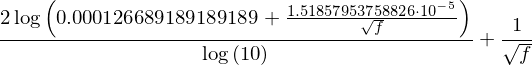

In [124]:
wut = csub.lhs - csub.rhs
wut

In [125]:
csub.lhs.evalf(subs={f:.01901857}), csub.rhs.evalf(subs={f:.01901857})

In [126]:
wut.evalf(subs={f:.01901857})

$$- 2 \\log{\\left (\\frac{0.27027027027027 eps}{d} + \\frac{2.51}{Re \\sqrt{x}} \\right )} - \\frac{1}{\\sqrt{x}$$

In [128]:
c = lambdify(f, wut, 'numpy')

In [136]:
c(.01901857)

c:\miniconda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


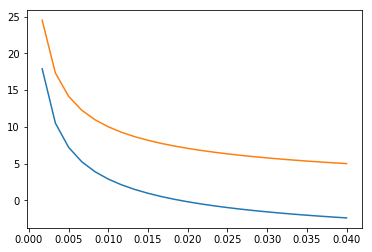

In [142]:
x = np.linspace(0,0.04, 25)
plt.plot(x, c(x))
plt.plot(x, 1/np.sqrt(x))